In [ ]:
import os
from google.colab import files

# Upload kaggle.json file
files.upload()

# Set up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle (1).json to kaggle (1).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ninadaithal/imagesoasis
!unzip imagesoasis.zip -d "/content/oasis_dataset"


Streaming output truncated to the last 5000 lines.
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: /content/oasis_dataset/Data/Very mil

In [ ]:
data_dir = "/content/oasis_dataset/Data"


In [ ]:
import os

# Recursively list files in the Data folder
for root, dirs, files in os.walk("/content/oasis_dataset/Data"):
    if files:  # Only print directories with files
        print(f"📁 Directory: {root}")
        print(f"   📄 Files: {files[:5]}")  # Display first 5 files for each directory
        print()


📁 Directory: /content/oasis_dataset/Data/Non Demented
   📄 Files: ['OAS1_0311_MR1_mpr-4_159.jpg', 'OAS1_0086_MR1_mpr-1_127.jpg', 'OAS1_0281_MR1_mpr-1_135.jpg', 'OAS1_0085_MR1_mpr-1_112.jpg', 'OAS1_0183_MR1_mpr-2_120.jpg']

📁 Directory: /content/oasis_dataset/Data/Very mild Dementia
   📄 Files: ['OAS1_0023_MR1_mpr-3_102.jpg', 'OAS1_0120_MR1_mpr-3_146.jpg', 'OAS1_0226_MR1_mpr-4_144.jpg', 'OAS1_0238_MR1_mpr-1_139.jpg', 'OAS1_0300_MR1_mpr-2_144.jpg']

📁 Directory: /content/oasis_dataset/Data/Moderate Dementia
   📄 Files: ['OAS1_0308_MR1_mpr-1_149.jpg', 'OAS1_0308_MR1_mpr-1_134.jpg', 'OAS1_0351_MR1_mpr-1_126.jpg', 'OAS1_0351_MR1_mpr-4_136.jpg', 'OAS1_0308_MR1_mpr-2_122.jpg']

📁 Directory: /content/oasis_dataset/Data/Mild Dementia
   📄 Files: ['OAS1_0185_MR1_mpr-2_159.jpg', 'OAS1_0122_MR1_mpr-2_139.jpg', 'OAS1_0122_MR1_mpr-3_141.jpg', 'OAS1_0122_MR1_mpr-2_145.jpg', 'OAS1_0137_MR1_mpr-1_102.jpg']



# Necessary imports for EDA

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import Counter
from tqdm import tqdm


# Number of images per each class

In [ ]:
from PIL import Image
import os
import numpy as np

dataset_path = 'Data'
class_names = os.listdir(dataset_path)

total_images = 0
image_shapes = []


for cls in class_names:
    cls_path = os.path.join(dataset_path, cls)
    images = os.listdir(cls_path)
    num_images = len(images)
    total_images += num_images

    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensures 3 channels
            image_shapes.append(np.array(img).shape)
        except:
            continue

    print(f"{cls}: {num_images} images")

# Convert to array for easy stats
image_shapes = np.array(image_shapes)

print(f"Total Images: {total_images}")

Mild Dementia: 5002 images
Non Demented: 67222 images
Very mild Dementia: 13725 images
Moderate Dementia: 488 images
Total Images: 86437


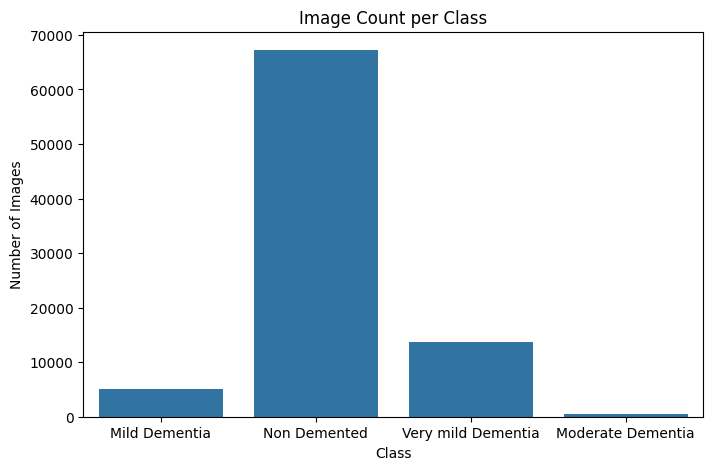

In [ ]:
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in class_names}

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Images height and width statistics

In [ ]:
heights = image_shapes[:, 0]
widths = image_shapes[:, 1]
channels = image_shapes[:, 2]

print(f"Image Height - Mean: {np.mean(heights):.1f}, Min: {np.min(heights)}, Max: {np.max(heights)}")
print(f"Image Width  - Mean: {np.mean(widths):.1f}, Min: {np.min(widths)}, Max: {np.max(widths)}")
print(f"Channels: {np.unique(channels)}")

Image Height - Mean: 248.0, Min: 248, Max: 248
Image Width  - Mean: 496.0, Min: 496, Max: 496
Channels: [3]


# Display a sample image for each class

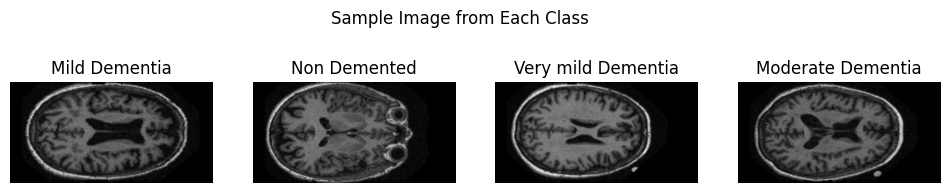

In [ ]:
plt.figure(figsize=(12, 6))
for i, cls in enumerate(class_names):
    img_path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
    img = Image.open(img_path)
    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.suptitle("Sample Image from Each Class",  y=0.7)
plt.show()


# Pixels values distribution

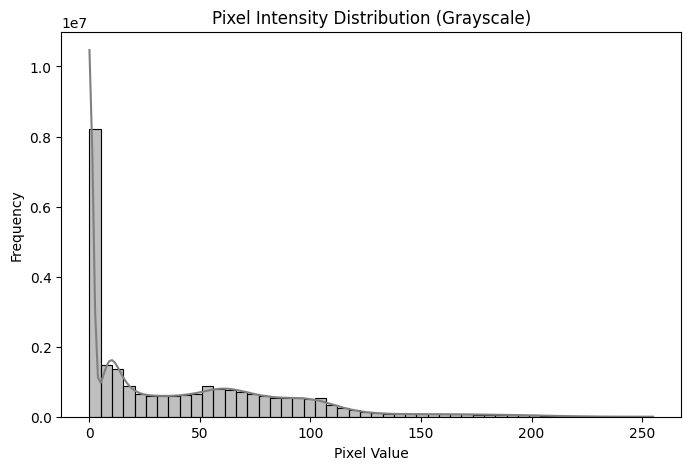

In [ ]:
pixel_values = []

for cls in class_names:
    class_path = os.path.join(dataset_path, cls)
    for file in os.listdir(class_path)[:50]:  # sample 50 images per class
        try:
            img = Image.open(os.path.join(class_path, file)).convert('L')  # Convert to grayscale
            pixel_values.extend(np.array(img).flatten())
        except:
            continue

plt.figure(figsize=(8, 5))
sns.histplot(pixel_values, bins=50, kde=True, color='gray')
plt.title("Pixel Intensity Distribution (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


# Checking for duplicate and corrupted images

In [ ]:
from hashlib import md5

hashes = set()
duplicates = []
corrupted = []

for cls in class_names:
    class_path = os.path.join(dataset_path, cls)
    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = md5(f.read()).hexdigest()
            if file_hash in hashes:
                duplicates.append(img_path)
            else:
                hashes.add(file_hash)
        except:
            corrupted.append(img_path)

print(f"Found {len(duplicates)} duplicate images")
print(f"Found {len(corrupted)} corrupted images")


Found 0 duplicate images
Found 0 corrupted images


# Data preprocessing(Pixels normalization, images resizing, data augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128  # Adjust image size if needed
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Shear transformations
    zoom_range=0.2,        # Zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Fill pixels after transformations
)

# Training data generator
train_gen = datagen.flow_from_directory(
    '/content/oasis_dataset/Data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/oasis_dataset/Data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 69151 images belonging to 4 classes.
Found 17286 images belonging to 4 classes.


# Visualizig images after data preprocessing (data augmentation)

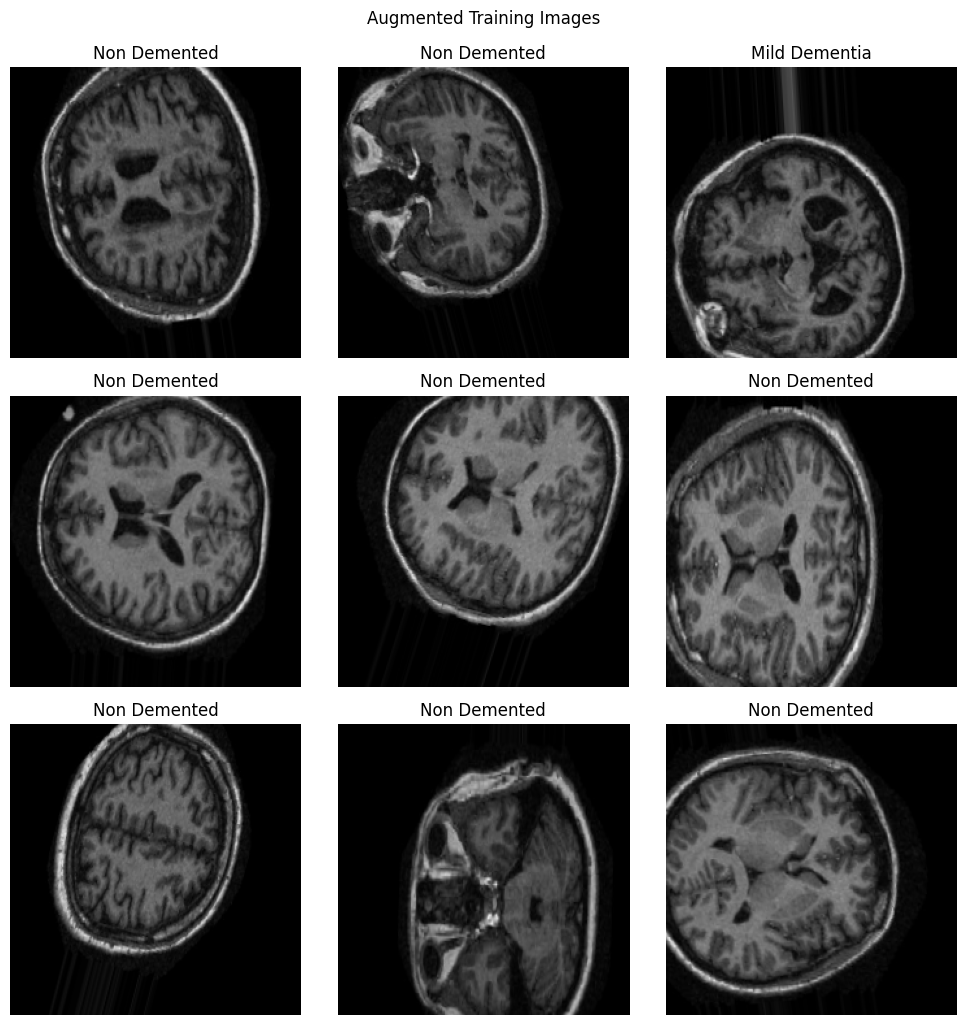

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_gen)

class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    class_name = idx_to_class[np.argmax(labels[i])]
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Augmented Training Images", y=1.02)
plt.show()


# Train and test images statistics

In [ ]:
print("Class indices:", train_gen.class_indices)

print("\nTrain set class distribution:")
for class_name, count in zip(train_gen.class_indices.keys(), train_gen.classes):
    print(f"{class_name}: {(train_gen.classes == train_gen.class_indices[class_name]).sum()}")

print("\nTest set class distribution:")
for class_name in val_gen.class_indices.keys():
    print(f"{class_name}: {(val_gen.classes == val_gen.class_indices[class_name]).sum()}")


Class indices: {'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}

Train set class distribution:
Mild Dementia: 4001
Moderate Dementia: 390
Non Demented: 53777
Very mild Dementia: 10980

Test set class distribution:
Mild Dementia: 1001
Moderate Dementia: 98
Non Demented: 13445
Very mild Dementia: 2745


# **The model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Add dropout after convolution layers
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Another dropout layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early_stop]  # Add the early stopping callback
)
history

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 432s 198ms/step - accuracy: 0.7762 - loss: 0.6947 - val_accuracy: 0.7777 - val_loss: 0.5793
Epoch 2/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 426s 197ms/step - accuracy: 0.7777 - loss: 0.5527 - val_accuracy: 0.7767 - val_loss: 0.5993
Epoch 3/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 421s 195ms/step - accuracy: 0.7782 - loss: 0.5348 - val_accuracy: 0.7763 - val_loss: 0.5621
Epoch 4/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 419s 194ms/step - accuracy: 0.7794 - loss: 0.5255 - val_accuracy: 0.7777 - val_loss: 0.5330
Epoch 5/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 414s 191ms/step - accuracy: 0.7812 - loss: 0.5171 - val_accuracy: 0.7777 - val_loss: 0.5707
Epoch 6/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 416s 192ms/step - accuracy: 0.7789 - loss: 0.5149 - val_accuracy: 0.7777 - val_loss: 0.5281
Epoch 7/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 419s 194ms/step - accuracy: 0.7791 - loss: 0.5139 - val_accuracy: 0.7499 - val_loss: 0.5683
Epoch 8/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 424s 196ms/step - ac

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
val_predictions = model.predict(val_gen, verbose=1)

# Step 3: Convert predictions from probabilities to class labels
val_pred_labels = np.argmax(val_predictions, axis=1)

# Step 4: Get the true labels from the validation generator
val_true_labels = val_gen.classes

# Step 5: Calculate the F1 score
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')  # weighted is for multi-class

print(f"F1 Score: {f1}")

541/541 ━━━━━━━━━━━━━━━━━━━━ 83s 152ms/step
F1 Score: 0.6805028279620673
